In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP

In [3]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 15) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 13) # legend fontsize

# Forecasting

In [4]:
COUNTRY = "Syria"
OUT_HYPER = 3

DIR_RESULTS = f"./{COUNTRY}/out_hyper_{OUT_HYPER}"
OUTPUT_FOLDER = f"./{COUNTRY}/out_hyper_{OUT_HYPER}/images"

In [5]:
# Load forecasting results.
xls = pd.ExcelFile(DIR_RESULTS + "/forecast.xlsx")

forecast_splits = dict()
for i, split in enumerate(xls.sheet_names):
    if i == 0:
        df = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    else:
        forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
        forecast_split.drop("FCG", axis = 1, level = 2, inplace = True)
        forecast_split = pd.concat([df, forecast_split], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
        # Save the predictions.
        forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.columns.names = ["Split", "Country", "AdminStrata", "Prediction"]
forecast_splits.head()

Split          Split 1                                                    \
Country          Syria                                                     
AdminStrata Al-Hasakeh                   Aleppo                 Ar-Raqqa   
Prediction         FCG Forecast Naive       FCG Forecast Naive       FCG   
Datetime                                                                   
2018-09-29    36.83872      NaN   NaN  31.03759      NaN   NaN  26.07362   
2018-09-30    36.83872      NaN   NaN  31.48741      NaN   NaN  23.87640   
2018-10-01    36.49929      NaN   NaN  31.39690      NaN   NaN  23.87640   
2018-10-02    36.37038      NaN   NaN  30.52060      NaN   NaN  23.18296   
2018-10-03    38.25699      NaN   NaN  29.05111      NaN   NaN  21.56177   

Split                                 ... Split 7                           \
Country                               ...   Syria                            
AdminStrata                As-Sweida  ...    Homs  Lattakia                  
Prediction  Forecast Naive       FCG  ...   Naive       FCG Forecast Naive   
Datetime                              ...                                    
2018-09-29       NaN   NaN  20.56277  ...     NaN  27.09497      NaN   NaN   
2018-09-30       NaN   NaN  20.47414  ...     NaN  26.07450      NaN   NaN   
2018-10-01       NaN   NaN  19.32859  ...     NaN  28.30441      NaN   NaN   
2018-10-02       NaN   NaN  17.54386  ...     NaN  27.55228      NaN   NaN   
2018-10-03       NaN   NaN  17.54386  ...     NaN  27.38095      NaN   NaN   

Split                                                               
Country                                                             
AdminStrata Rural Damascus                  Tartous                 
Prediction             FCG Forecast Naive       FCG Forecast Naive  
Datetime                                                            
2018-09-29       21.638800      NaN   NaN  12.46537      NaN   NaN  
2018-09-30       22.568889      NaN   NaN  12.94964      NaN   NaN  
2018-10-01       22.215946      NaN   NaN  12.45675      NaN   NaN  
2018-10-02       22.723973      NaN   NaN  12.18369      NaN   NaN  
2018-10-03       22.494552      NaN   NaN  12.72342      NaN   NaN  

[5 rows x 252 columns]

In [6]:
TsIP(forecast_splits).interactive_plot_df(title = "", matplotlib = True, style = "lines", comparison = False)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [7]:
def plot_prediction(df, split, country, province, ax):
    df = df[split][country][province]
    # Add the time-series to the figure.
    df.columns.name = None
    last_date = df["Forecast"].last_valid_index()
    df = df.loc[:last_date]
    for column in df.columns: 
        if column == "FCG":
            df[column].plot(ax = ax, label = '_', style = ":", c = "black", alpha = 0.5)
        elif column == "Naive":
            df[column].plot(ax = ax, label = "naive", style = "-", c = sns.color_palette("tab10")[0], legend = False)
        else:
            df[column].plot(ax = ax, label = "model", style = "-", c = sns.color_palette("tab10")[1], legend = False)
            
    # Set legend.
    ax.legend(title = df.columns.name, loc = "best")
    # Set axis names.
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.autoscale()

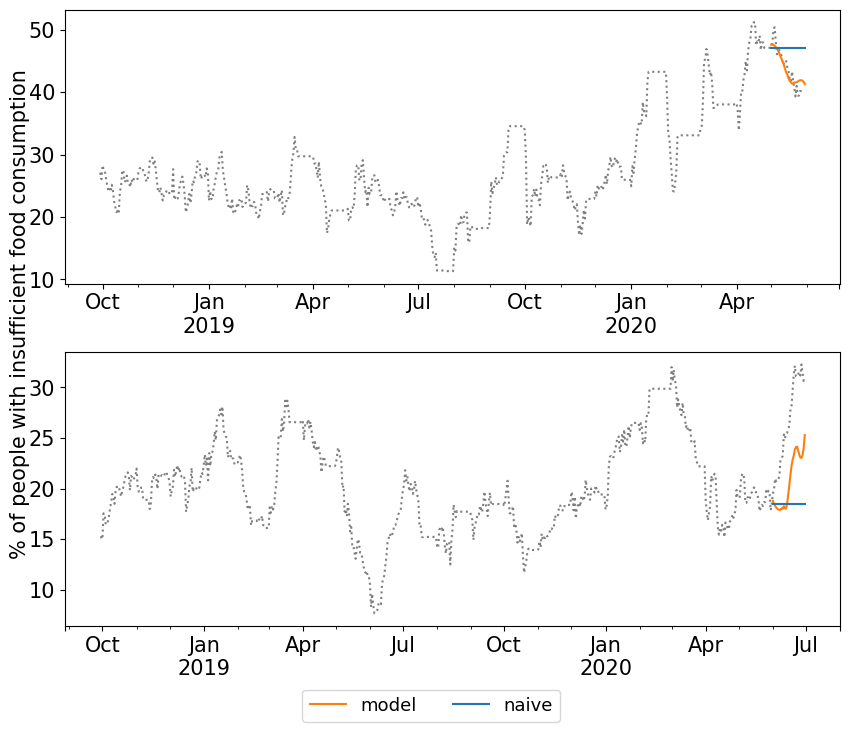

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 8))    
fig.subplots_adjust(hspace = .25)

plot_prediction(forecast_splits, "Split 4", "Syria", "Lattakia", axs[0])
plot_prediction(forecast_splits, "Split 5", "Syria", "Damascus", axs[1])

fig.text(0.07, 0.5, "% of people with insufficient food consumption", va = "center", rotation = "vertical", 
         fontdict = {"size": 15})
axs.flatten()[0].get_legend().remove()
axs.flatten()[-1].legend(bbox_to_anchor = (0.65, -0.2), ncol = 2)

fig.savefig(OUTPUT_FOLDER + "/predictions.png", bbox_inches = "tight", dpi = 600)